#Neural Network

Oviya Adhan

Final Project

DATASCI 207 Machine Learning

Professor Cornelia Paulik

In [59]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
tf.get_logger().setLevel('INFO')

In [60]:
# Load data
train_df = pd.read_csv('train_final.csv')
val_df = pd.read_csv('val_final.csv')
test_df = pd.read_csv('test_final.csv')

In [61]:
# Check data
train_df.head()

,IsHighwayRelated,ExtentOfInjuryCode,SpeedLimit,CollisionTypeDescription_BROADSIDE,CollisionTypeDescription_HEAD-ON,CollisionTypeDescription_HIT OBJECT,CollisionTypeDescription_OTHER,CollisionTypeDescription_OVERTURNED,CollisionTypeDescription_REAR END,CollisionTypeDescription_SIDE SWIPE,...,SpecialInformation_CELL PHONE NOT IN USE / SCHOOL BUS RELATED,SpecialInformation_CELL PHONE NOT IN USE,SpecialInformation_CELL PHONE USE UNKNOWN,SpecialInformation_HAZARDOUS MATERIAL / CELL PHONE NOT IN USE,SpecialInformation_HAZARDOUS MATERIAL,SpecialInformation_CELL PHONE NOT IN USE / CELL PHONE USE UNKNOWN,SpecialInformation_CELL PHONE USE UNKNOWN / SCHOOL BUS RELATED,SpecialInformation_HAZARDOUS MATERIAL / CELL PHONE HANDSFREE IN USE,SpecialInformation_HAZARDOUS MATERIAL / CELL PHONE USE UNKNOWN,SpecialInformation_SCHOOL BUS RELATED
0,1,No Injury,0.892906,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,Minor,1.225424,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,1,No Injury,-0.437167,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,0,Minor,-2.432276,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,No Injury,0.227869,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 1 - Encode y labels

In [62]:
# Define encoding
class_map = {'No Injury':0, 'Minor':1, 'Serious':2, 'Fatal':3}
target_names = ['No Injury', 'Minor', 'Serious', 'Fatal'] # store as list for later use

# Encode
train_df['ExtentOfInjuryCode'] = train_df['ExtentOfInjuryCode'].map(class_map)
val_df['ExtentOfInjuryCode'] = val_df['ExtentOfInjuryCode'].map(class_map)
test_df['ExtentOfInjuryCode'] = test_df['ExtentOfInjuryCode'].map(class_map)

In [63]:
# Check data
train_df.head()

,IsHighwayRelated,ExtentOfInjuryCode,SpeedLimit,CollisionTypeDescription_BROADSIDE,CollisionTypeDescription_HEAD-ON,CollisionTypeDescription_HIT OBJECT,CollisionTypeDescription_OTHER,CollisionTypeDescription_OVERTURNED,CollisionTypeDescription_REAR END,CollisionTypeDescription_SIDE SWIPE,...,SpecialInformation_CELL PHONE NOT IN USE / SCHOOL BUS RELATED,SpecialInformation_CELL PHONE NOT IN USE,SpecialInformation_CELL PHONE USE UNKNOWN,SpecialInformation_HAZARDOUS MATERIAL / CELL PHONE NOT IN USE,SpecialInformation_HAZARDOUS MATERIAL,SpecialInformation_CELL PHONE NOT IN USE / CELL PHONE USE UNKNOWN,SpecialInformation_CELL PHONE USE UNKNOWN / SCHOOL BUS RELATED,SpecialInformation_HAZARDOUS MATERIAL / CELL PHONE HANDSFREE IN USE,SpecialInformation_HAZARDOUS MATERIAL / CELL PHONE USE UNKNOWN,SpecialInformation_SCHOOL BUS RELATED
0,1,0,0.892906,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,1.225424,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,1,0,-0.437167,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,0,1,-2.432276,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0.227869,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 2 - Split data into X, Y sets

In [64]:
# Check shape of data before splitting
print(train_df.shape, val_df.shape, test_df.shape)

(218338, 458) (54585, 458) (103669, 458)


In [65]:
# Train
X_train = train_df.copy().drop(columns=['ExtentOfInjuryCode'])
y_train = train_df['ExtentOfInjuryCode'].copy()

# Validation
X_val = val_df.copy().drop(columns=['ExtentOfInjuryCode'])
y_val = val_df['ExtentOfInjuryCode'].copy()

# Test
X_test = test_df.copy().drop(columns=['ExtentOfInjuryCode'])
y_test = test_df['ExtentOfInjuryCode'].copy()

In [66]:
# Check shape of data after splitting
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(218338, 457) (54585, 457) (103669, 457)
(218338,) (54585,) (103669,)


###3 - Define Model (Neural Network)

In [67]:
print("Train label values:", np.unique(y_train))


Train label values: [0 1 2 3]


In [68]:
def build_model(n_classes,
                n_features,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
    """Build a multiclass logistic regression if 0 hidden layers; or a neural network model if > 0 using Keras.

    Args:
    n_features
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers. Default to ReLU
    optimizer: The optimizer to use (SGD, Adam). Default to SGD
    learning_rate: The desired learning rate for the optimizer. Default to 0.01

    Returns:
    model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    hidden_layer_sizes = list(hidden_layer_sizes)

    # keras.Sequential for neural networks (multiple layers)
    model = tf.keras.Sequential()

    # If 0 hidden layers
    if hidden_layer_sizes == []:
      # Use multiclass logisitic regression:
      model.add(tf.keras.Input(shape=(n_features,), name='Input'))        # Create input layer
      # Create output layer.
      model.add(tf.keras.layers.Dense(                                    # Create output layer
      units=n_classes,                                                    # output dim (in this case: 10)
      input_shape=(n_features,),                                          # input dim
      use_bias=True,                                                      # use a bias (intercept) param
      activation='softmax',                                               # softmax for multiclass classification!
      kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01, seed=0), # initialize weights to random normal to encourage model to learn about distinct features
      bias_initializer=tf.keras.initializers.Zeros()                      # initialize bias to zero (a neutral start for all features)
      ))

    # Else
    else:
      # Use neural network

      # First hidden layer (define input shape from data)
      model.add(tf.keras.layers.Dense(
            units=hidden_layer_sizes[0],
            input_shape=(n_features,),
            activation=activation
      ))

      # Remaining hidden layers
      for units in hidden_layer_sizes[1:]:
        # Create hidden layers (input shape is inferred at each layer step during .fit())
        model.add(tf.keras.layers.Dense(units=units, activation=activation))
      # Create output layer.
      model.add(tf.keras.layers.Dense(
          units=n_classes,                                                            # output dim (in this case: 4)
          use_bias=True,                                                              # use a bias (intercept) param
          activation='softmax',                                                       # softmax for multiclass classification!
          kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01, seed=0), # initialize weights to random normal to encourage model to learn about distinct features
          bias_initializer=tf.keras.initializers.Zeros()                              # initialize bias to zero (a neutral start for all features)
      ))


    # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
    if optimizer.lower() == 'sgd':
      optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Finally, compile the model. Select the accuracy metric (!!!). This finalizes the graph for training.
    model.compile(
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),                   # Due to sparse encoding of labels
          #loss = tf.keras.losses.CategoricalCrossentropy(),                      # If using dense representation (one-hot encoding)
          optimizer=optimizer,
          metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]  # Due to sparse encoding of labels
          #tf.keras.metrics.CategoricalAccuracy() # If one-hot (dense) encoded labels
      )


    return model

###4 - Train & Evaluate Model

In [69]:
# Calculate class weights (due to inbalanced class proporations)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))

In [70]:
def train_and_evaluate(X_train,
                       y_train,
                       X_val,
                       y_val,
                       hidden_layer_sizes=[],
                       activation='relu',
                       optimizer='SGD',
                       learning_rate=0.01,
                       num_epochs=10):
    # Set random seeds
    np.random.seed(0)
    tf.random.set_seed(0)

    # Build the model.
    model = build_model(n_classes=4,
                      n_features=X_train.shape[1],
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

    # Train the model.
    history = model.fit(
        x=X_train,
        y=y_train,
        validation_data=(X_val, y_val),
        epochs=num_epochs,
        batch_size=64,
        class_weight=class_weights,
        verbose=0)

    # Retrieve the training metrics (after each train epoch) and the final validation accuracy.
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.xticks(range(num_epochs))
    plt.xlabel('Train epochs')
    plt.legend()
    plt.show()

    print('Training accuracy: %1.4f' %history.history['accuracy'][-1])
    print('Validation accuracy: %1.4f' %history.history['val_accuracy'][-1])

    return model

Try for best activation and optimizer combination:

Model ID | Data | Hidden sizes | Activation| Optimizer | Learning rate | #Parameters | Training accuracy| Validation accuracy
-|-|-|-|-|-|-|-|-
1 | digits | [] | relu | SGD |0.01| 1832 | 0.6068 | 0.6035
2 | digits | [] | tanh | SGD |0.01| 1832 | 0.6068 | 0.6035
3 | digits | [] | relu | Adam |0.01| 1832 | 0.6023 | 0.6175
4 | digits | [] | tanh | Adam |0.01| 1832 | 0.6023 | 0.6175


Results for Model 1 (ReLU, SGD):


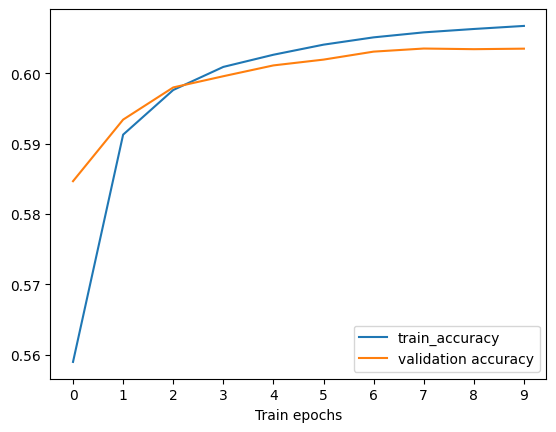

Training accuracy: 0.6068
Validation accuracy: 0.6035
Results for Model 2 (Tanh, SGD):


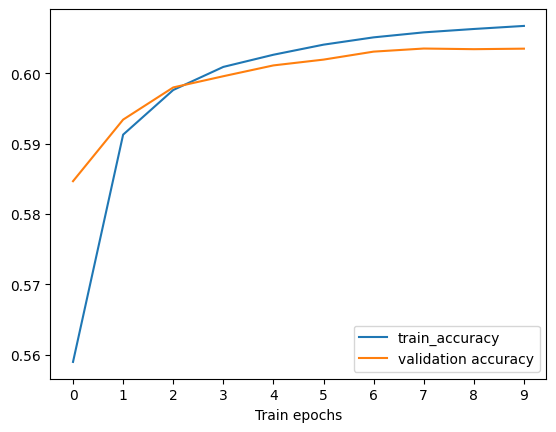

Training accuracy: 0.6068
Validation accuracy: 0.6035
Results for Model 3 (ReLU, Adam):


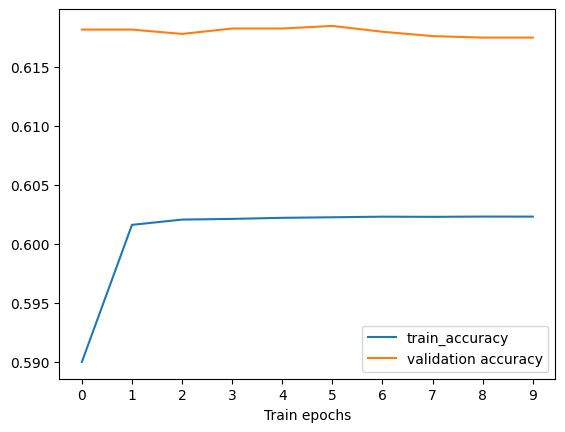

Training accuracy: 0.6023
Validation accuracy: 0.6175
Results for Model 4 (Tanh, Adam):


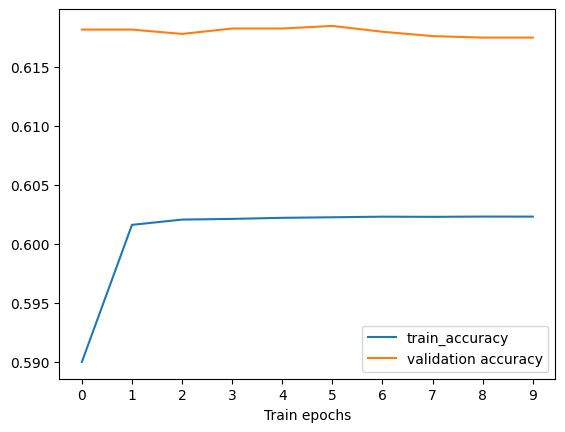

Training accuracy: 0.6023
Validation accuracy: 0.6175


In [71]:
# run the function
print('Results for Model 1 (ReLU, SGD):')
model1 = train_and_evaluate(X_train, y_train, X_val, y_val, activation='relu', optimizer='SGD')

print('Results for Model 2 (Tanh, SGD):')
model2 = train_and_evaluate(X_train, y_train, X_val, y_val, activation='tanh', optimizer='SGD')

print('Results for Model 3 (ReLU, Adam):')
model3 = train_and_evaluate(X_train, y_train, X_val, y_val, activation='relu', optimizer='Adam')

print('Results for Model 4 (Tanh, Adam):')
model4 = train_and_evaluate(X_train, y_train, X_val, y_val, activation='tanh', optimizer='Adam')

In [75]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │         1,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834 (7.17 KB)

 Trainable params: 1,832 (7.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

We will use ReLU and SGD for our configuration since it is the most computationally simple without compromising on accuracy and without underfitting as seen with Adam.

Try for best hidden layer size:

Model ID | Data | Hidden sizes | Activation| Optimizer | Learning rate | #Parameters | Training accuracy| Validation accuracy
-|-|-|-|-|-|-|-|-
5 | digits | [128] | relu | SGD |0.01| 59,140 | 0.6069| 0.5997
6 | digits | [256, 128] | relu | SGD |0.01| 150,660 | 0.6079 | 0.5735

Results for Model 5 ([128]):


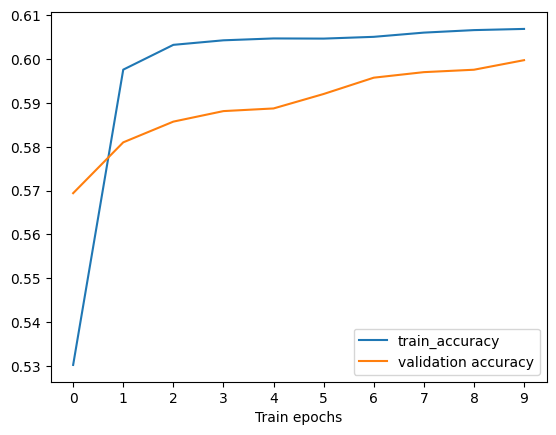

Training accuracy: 0.6069
Validation accuracy: 0.5997
Results for Model 6 ([256,128]):


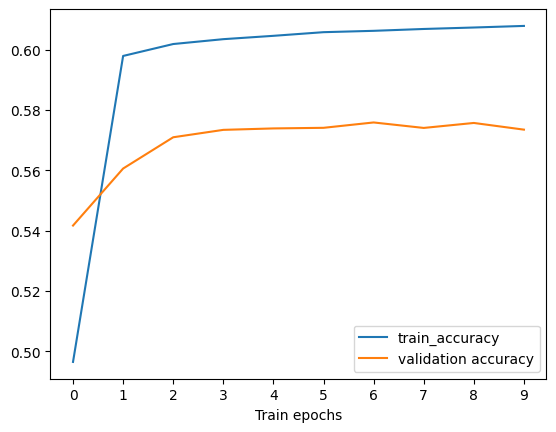

Training accuracy: 0.6079
Validation accuracy: 0.5735


In [73]:
print('Results for Model 5 ([128]):')
model5 = train_and_evaluate(X_train, y_train, X_val, y_val, hidden_layer_sizes=[128], activation='relu', optimizer='SGD')

print('Results for Model 6 ([256,128]):')
model6 = train_and_evaluate(X_train, y_train, X_val, y_val, hidden_layer_sizes=[256,128], activation='relu', optimizer='SGD')

In [76]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,662 (588.53 KB)

 Trainable params: 150,660 (588.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model 5 provides the best generalization and accuracy while also keeping the compute relatively simple.

###5 - Evaluate Optimal Model

In [77]:
import warnings; warnings.filterwarnings('ignore')
# Print out classification report with precision, recall, f-score, support

# Train
y_pred_train = model5.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)
print(f'Train Classification Report:\n{classification_report(y_train, y_pred_train, target_names=target_names)}')

# Validation
y_pred_val = model5.predict(X_val)
y_pred_val = np.argmax(y_pred_val, axis=1)
print(f'Validation Classification Report:\n{classification_report(y_val, y_pred_val, target_names=target_names)}')

# Test
y_pred_test = model5.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)
print(f'Test Classification Report:\n{classification_report(y_test, y_pred_test, target_names=target_names)}')

6824/6824 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Train Classification Report:
              precision    recall  f1-score   support

   No Injury       0.81      0.68      0.74    134059
       Minor       0.54      0.47      0.50     76242
     Serious       0.11      0.50      0.18      6385
       Fatal       0.11      0.77      0.19      1652

    accuracy                           0.60    218338
   macro avg       0.39      0.60      0.40    218338
weighted avg       0.69      0.60      0.63    218338

1706/1706 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Validation Classification Report:
              precision    recall  f1-score   support

   No Injury       0.81      0.68      0.74     33637
       Minor       0.54      0.47      0.50     18986
     Serious       0.11      0.49      0.18      1562
       Fatal       0.10      0.71      0.18       400

    accuracy                           0.60     54585
   macro avg       0.39      0.59      0.40     54585
weighted avg       0.69      0.60   

### Push notebook to Git

In [ ]:
# Connect to GitHub Repo
from getpass import getpass

# Step 1: Enter token securely
token = getpass('Enter your GitHub token: ')

# Step 2: Build the full URL
repo_owner = "christinesako-berk"
repo_name = "ds_207_final_project"
repo_url = f"https://{token}@github.com/{repo_owner}/{repo_name}.git"

# Clone repo
!git clone "{repo_url}"